In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

In [2]:
data = pd.read_csv('/content/data_stathub.csv')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id_tabel  360 non-null    object
 1   kategori  360 non-null    object
 2   uraian    360 non-null    object
 3   satuan    360 non-null    object
 4   tahun     360 non-null    int64 
 5   nilai     360 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 17.0+ KB


,id_tabel,kategori,uraian,satuan,tahun,nilai
0,B.1.12.01,Moda Perkeretaapian,Kecelakaan,Kejadian,2005,11
1,B.1.12.01,Moda Perkeretaapian,Korban Luka-luka,Orang,2005,0
2,B.1.12.01,Moda Perkeretaapian,Korban Meninggal,Orang,2005,0
3,B.1.12.01,Moda Perkeretaapian,Jumlah Laporan Final,Dokumen,2005,0
4,B.1.12.01,Moda Perkeretaapian,Rekomendasi Keselamatan,Rekomendasi,2005,0


In [3]:
data.dtypes

,0
id_tabel,object
kategori,object
uraian,object
satuan,object
tahun,int64
nilai,int64


In [4]:
#Menghapuskolomyangtidakdiperlukan
data = data.drop(['id_tabel', 'uraian', 'satuan'], axis=1)
data.head()

,kategori,tahun,nilai
0,Moda Perkeretaapian,2005,11
1,Moda Perkeretaapian,2005,0
2,Moda Perkeretaapian,2005,0
3,Moda Perkeretaapian,2005,0
4,Moda Perkeretaapian,2005,0


In [5]:
data.shape

(360, 3)

In [6]:
data.count()

,0
kategori,360
tahun,360
nilai,360


In [7]:
data = data.drop_duplicates()
data.head()

,kategori,tahun,nilai
0,Moda Perkeretaapian,2005,11
1,Moda Perkeretaapian,2005,0
5,Moda Pelayaran,2005,6
6,Moda Pelayaran,2005,0
10,Moda Penerbangan,2005,23


In [8]:
data.count()

,0
kategori,276
tahun,276
nilai,276


In [10]:
print(data.isnull().sum()) #aman, gada yg null

kategori    0
tahun       0
nilai       0
dtype: int64


In [11]:
from sklearn.preprocessing import LabelEncoder

encoder ={}
for col in data.columns:
    encoder[col] = LabelEncoder()
    data[col] = encoder[col].fit_transform(data[col])
print(data)

     kategori  tahun  nilai
0           3      0     11
1           3      0      0
5           1      0      6
6           1      0      0
10          2      0     22
..        ...    ...    ...
355         0     17     15
356         0     17     88
357         0     17     67
358         0     17     14
359         0     17     80

[276 rows x 3 columns]


In [12]:
X = data [['tahun', 'nilai']]

In [13]:
y = data['kategori']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier()
tree_model = DecisionTreeClassifier(max_depth=5, min_samples_leaf=15, random_state=42)
tree_model = tree_model.fit(X_train, y_train)


In [16]:
from sklearn.metrics import accuracy_score

y_pred = tree_model.predict(X_test)

acc_score = round(accuracy_score(y_pred, y_test), 3)

print('Accuracy: ', acc_score)

Accuracy:  0.286


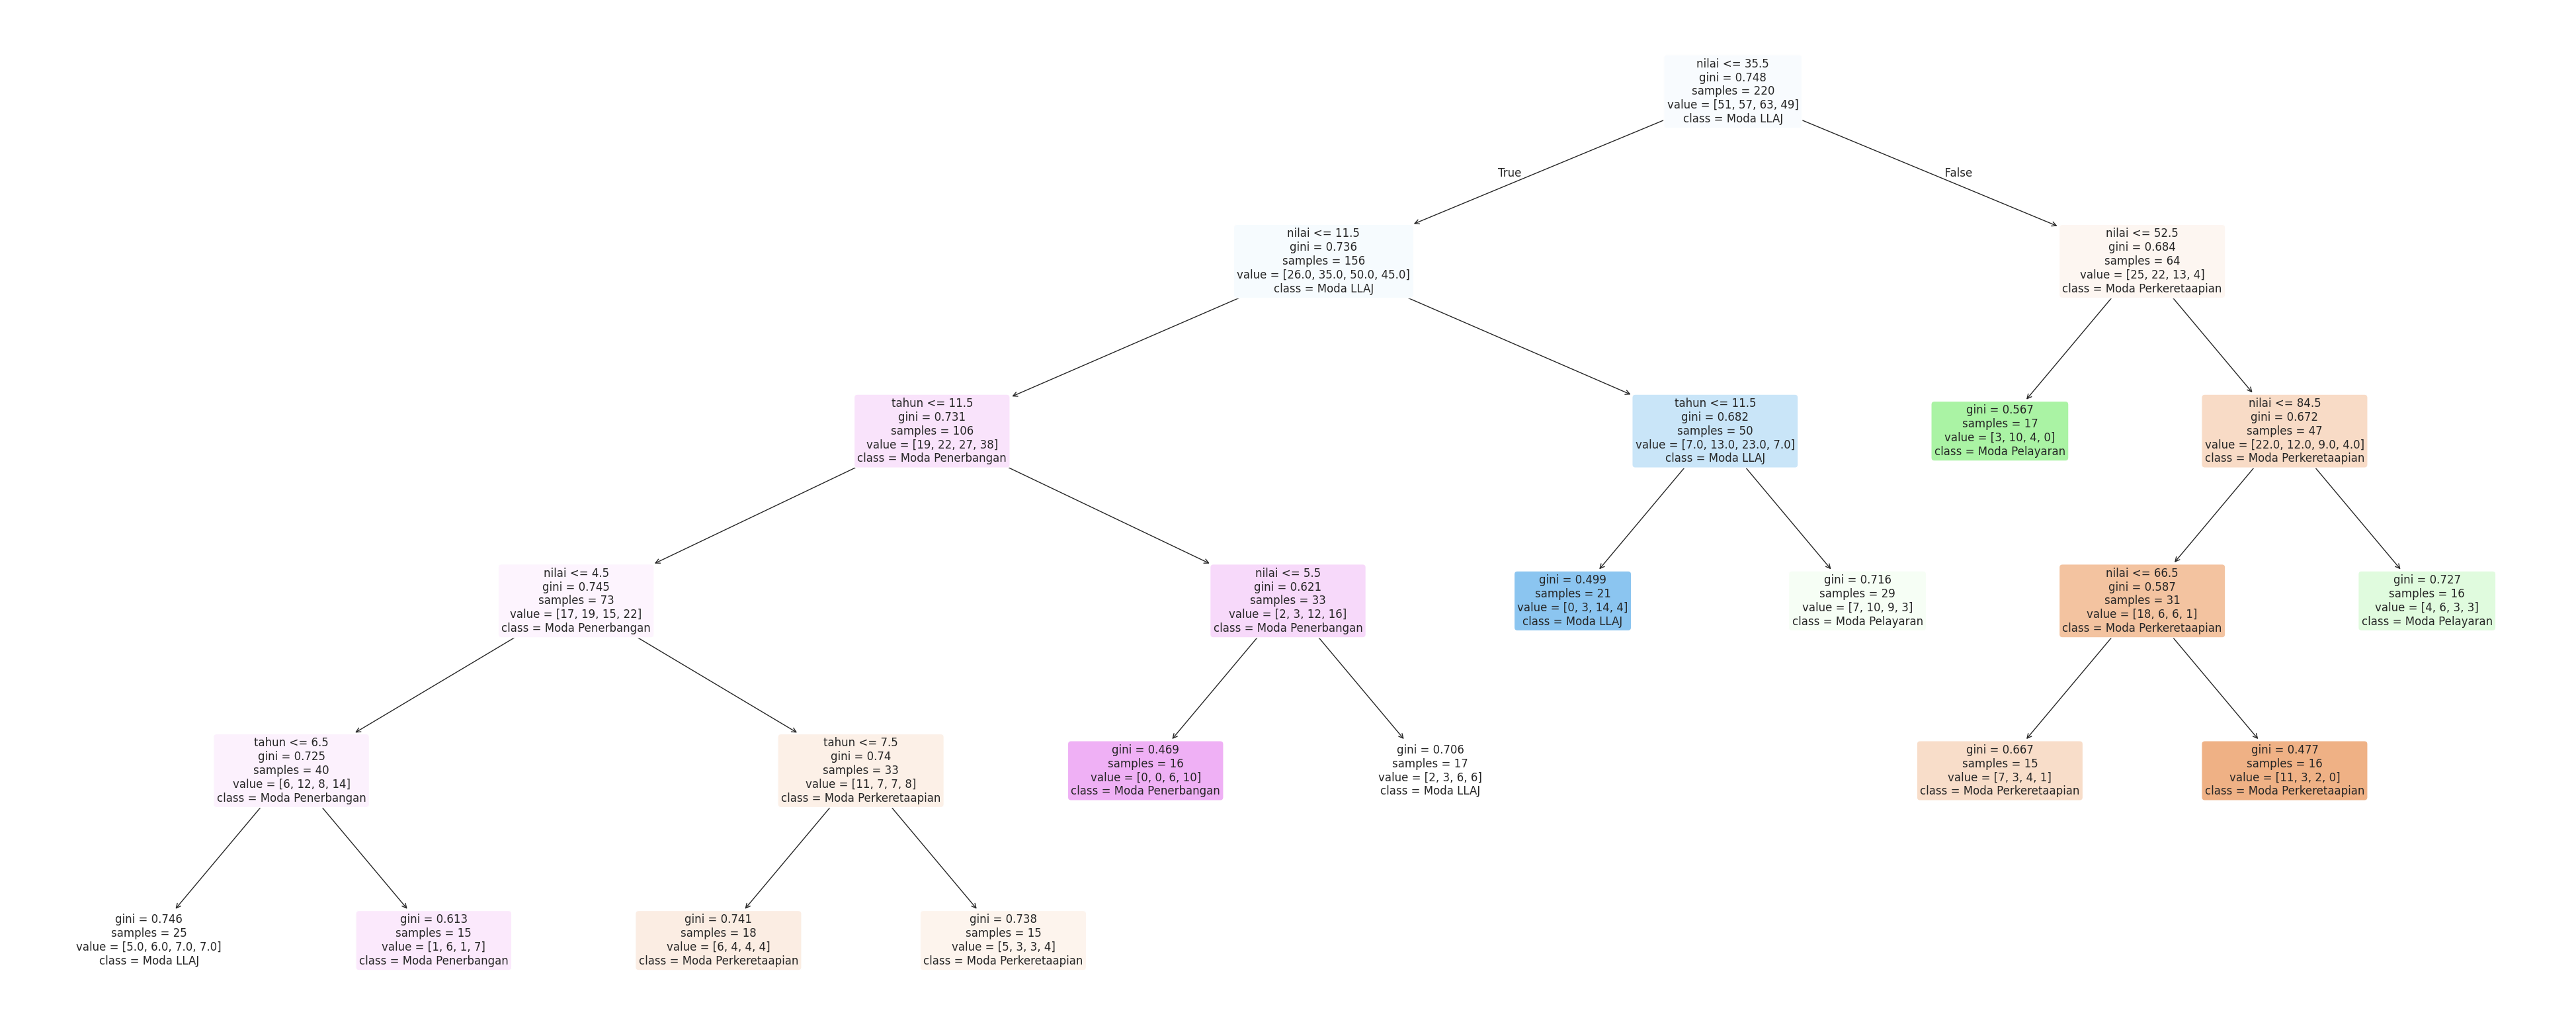

In [17]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(50, 20))
tree.plot_tree(tree_model, feature_names=[ 'tahun', 'nilai'], class_names=['Moda Perkeretaapian', 'Moda Pelayaran', 'Moda LLAJ', 'Moda Penerbangan'],
               filled=True, rounded=True, fontsize=12)
plt.savefig("decision_tree.png")
plt.show()
